1. XỬ LÍ GIẢM SỐ LƯỢNG MÀU ẢNH

### IMPORT THƯ VIỆN <a class="anchor" id="c22"></a>

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### XỬ LÍ DỮ LIỆU ẢNH ĐẦU VẢO <a class="anchor" id="c22"></a>

In [13]:
def get_image(path):
    try:
        img=Image.open(path)
    except:
        print("Cannot open file. Please check again :()")
        return None
    # chuyển image về numpy array
    img =  np.array(img)
    return img

### KHỞI TẠO CENTROIDS <a class="anchor" id="c22"></a>

In [14]:
def Init_centroids(img,k_cluster,type):
    # chọn centroids có c kênh màu là giá trị ramdom trong khoảng [0,255]
    if type=='random':
        return np.random.randint(0,256,size=(k_cluster,len(img[0])))
    # chọn centroids là k pixels random trong image
    elif type=='in_pixels':
        return img[np.random.choice(img.shape[0],size=k_cluster,replace=False)]
    return None

### CẬP NHẬT CENTROIDS <a class="anchor" id="c22"></a>

In [15]:
def update_centroids(img,labels,old_centroids,k_cluster):
    centroids = np.zeros(old_centroids.shape)
    for i in range(k_cluster):
        pixel = img[labels==i]
        if (pixel.shape[0]): # chỉ tính toán giá trị trung tâm khi trong cluster có ít nhất 1 pixel, tránh nan value
            # centroids mới là điểm trung bình của các pixels nằm trong cluster của centroids cũ
            centroids[i] = np.mean(pixel, axis=0)
    return centroids

### KMEANS CLUSTERING ALGORITHM <a class="anchor" id="c22"></a>

In [16]:
def kmeans(img,k_cluster,max_iter,init_centroids):
    centroids = Init_centroids(img,k_cluster,init_centroids)
    labels = np.empty((0,))
    
    for _ in range(max_iter):
        # gán labels cho từng pixel
        labels = np.argmin(np.linalg.norm(img - centroids[:, None], axis=2), axis=0)
    
        # cập nhật centroids
        old_centroids = centroids
        centroids = update_centroids(img,labels,old_centroids,k_cluster)
        
        # điều kiện dừng: khi các điểm trung tâm không còn thay đổi
        if np.all(centroids == old_centroids):
            break
        
    return centroids,labels

### XỬ LÍ DỮ LIỆU ẢNH ĐẦU RA <a class="anchor" id="c22"></a>

In [17]:
def restore_image(shape,centroids,labels):
    img =  centroids[labels].astype(int)
    return img.reshape(shape)

### LƯU ẢNH <a class="anchor" id="c22"></a>

In [18]:
def output_file(img, filename, ext, path):
    try:
        # chuyển image thành đối tượng hình ảnh PIL
        img = Image.fromarray(img.astype(np.uint8))
        img.save(path+'/'+filename+'.'+ext)
    except:
        print("Cannot save this file")
        return

### CÀI ĐẶT HÀM MAIN <a class="anchor" id="c22"></a>

In [19]:
init_centroids = 'random'
max_iter = 100
k_cluster = 5

# nhập thông tin input
input_path=input("Enter the file path: ")

# lấy dữ liệu từ image ở input
input_img = get_image(input_path)
# reshape để lấy mảng 2d của image
img_2d = input_img.reshape(-1,input_img.shape[-1]) 

# nhập thông tin output
filename=input("Enter the output file name: ")
ext=input("Enter the output file extension(png/pdf): ")
output_path=input("Enter the output file path: ")

# thực thi thuật toán kmeans 
centroids,labels = kmeans(img_2d,k_cluster,max_iter,init_centroids)

# khôi phục ảnh đã được giảm màu
new_img = restore_image(input_img.shape,centroids,labels)

# lưu file 
output_file(new_img,filename,ext,output_path)

### Xuất hình ảnh <a class="anchor" id="c22"></a>

Text(0.5, 1.0, 'After:')

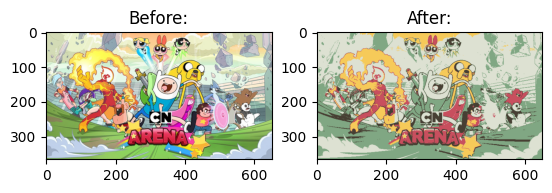

In [20]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(input_img)
axes[0].set_title('Before:')
axes[1].imshow(new_img)
axes[1].set_title('After:')

2. RESIZE HÌNH ẢNH

### RESIZE HÌNH ẢNH VỚI NEAREST NEIGHBOR INTERPOLATION <a class="anchor" id="c22"></a>

In [21]:
def nearest_neighbor_resize(img,new_height,new_width):
    height,width,channels = img.shape
    
    # tạo array với hình dạng mới cần thay đổi
    result = np.full((new_height,new_width,channels),-1)
    
    # tính tỉ lệ độ dài, rộng của hình ảnh cũ so với hình ảnh mới
    w_ratio =  width / new_width
    h_ratio = height / new_height
    
    for y in range(new_height):
        for x in range(new_width):
            # nhân tọa độ pixel hiện tại với tỉ lệ để tìm ra giá trị gần nhất của tọa độ tương ứng ở ảnh cũ
            src_x = int(x*w_ratio)
            src_y = int(y*h_ratio)
            # gán giá trị của pixel ở ảnh gốc sang ảnh mới
            result[y][x] = img[src_y,src_x]
            
    return result

old size: 
(366, 650)
new size: 
(250, 550)


Text(0.5, 1.0, 'After:')

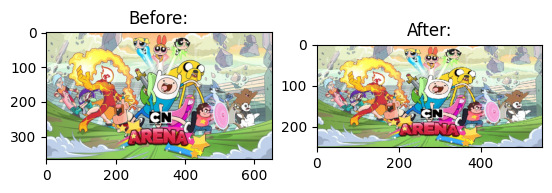

In [22]:
resize = input("Enter input file path:")

img_= get_image(resize)
print("old size: ")
print((img_.shape[0],img_.shape[1]))

new_height =  int(input("Enter new height: "))
new_width = int(input("Enter new width: "))
print("new size: ")
print((new_height,new_width))

# thực thi thuật toán resize
img_resized = nearest_neighbor_resize(img_,new_height,new_width)

# nhập thông tin output
filename=input("Enter the output file name: ")
ext=input("Enter the output file extension(png/pdf): ")
output_path=input("Enter the output file path: ")
output_file(img_resized,filename,ext,output_path)

# show hình ảnh
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img_)
axes[0].set_title('Before:')
axes[1].imshow(img_resized)
axes[1].set_title('After:')